# 📺Netflix :: 🥤Visualization, 🎬Recommendation, 🍟EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
netflix = pd.read_csv('data/netflix_titles.csv')
display(netflix.head())
netflix.shape

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


(8807, 12)

In [5]:
netflix.count()

show_id         8807
type            8807
title           8807
director        6173
cast            7982
country         7976
date_added      8797
release_year    8807
rating          8803
duration        8804
listed_in       8807
description     8807
dtype: int64

## TV Shows vs. Movie

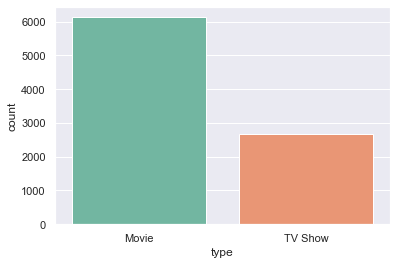

In [9]:
sns.set(style='darkgrid')
ax = sns.countplot(x='type', data=netflix, palette='Set2')

In [6]:
netflix_shows = netflix[netflix['type']=='TV Shows']
netflix_movies = netflix[netflix['type']=='Movie']


### 영상물 등급 제도/미국
- https://namu.wiki/w/%EC%98%81%EC%83%81%EB%AC%BC%20%EB%93%B1%EA%B8%89%20%EC%A0%9C%EB%8F%84/%EB%AF%B8%EA%B5%AD
- TV-MA : 17세 미만의 어린이 혹은 청소년한테 부적절한 프로그램
- TV-14 : 14세 미만의 어린이 혹은 청소년이 시청하기에 부적절한 프로그램


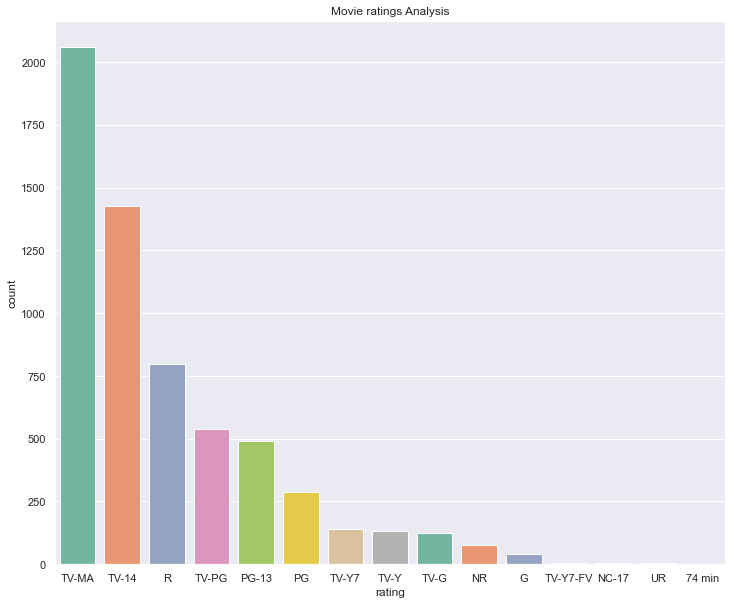

In [13]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
sns.countplot(x="rating",
              data=netflix_movies, 
              palette="Set2", 
              order=netflix_movies['rating'].value_counts().index[:15])
plt.title('Movie ratings Analysis',)
plt.show()

## Analysing IMDB ratings to get top raed movies on Netflix

dataset: https://github.com/sahildit/IMDB-Movies-Extensive-Dataset-Analysis

In [16]:
# usecols
# usecolslist-like or callable, optional
# Return a subset of the columns. If list-like, all elements must either be positional (i.e. integer indices into the document columns) or strings that correspond to column names provided either by the user in names or inferred from the document header row(s). If names are given, the document header row(s) are not taken into account. For example, a valid list-like usecols parameter would be [0, 1, 2] or ['foo', 'bar', 'baz']. Element order is ignored, so usecols=[0, 1] is the same as [1, 0]. To instantiate a DataFrame from data with element order preserved use pd.read_csv(data, usecols=['foo', 'bar'])[['foo', 'bar']] for columns in ['foo', 'bar'] order or pd.read_csv(data, usecols=['foo', 'bar'])[['bar', 'foo']] for ['bar', 'foo'] order.

# If callable, the callable function will be evaluated against the column names, returning names where the callable function evaluates to True. An example of a valid callable argument would be lambda x: x.upper() in ['AAA', 'BBB', 'DDD']. Using this parameter results in much faster parsing time and lower memory usage.


imdb_ratings=pd.read_csv('data/IMDb ratings.csv',usecols=['weighted_average_vote'])
imdb_titles=pd.read_csv('data/IMDb movies.csv', usecols=['title','year','genre'])

In [18]:
display(imdb_ratings.head(2))
display(imdb_titles.head(2))

,weighted_average_vote
0,5.9
1,6.1


,title,year,genre
0,Miss Jerry,1894,Romance
1,The Story of the Kelly Gang,1906,"Biography, Crime, Drama"


In [19]:
ratings = pd.DataFrame({'Title':imdb_titles.title,
                       'Release Year':imdb_titles.year,
                       'Rating':imdb_ratings.weighted_average_vote,
                       'Genre':imdb_titles.genre})
# subset : column label or sequence of labels, optional
# Only consider certain columns for identifying duplicates, by default use all of the columns.

# inplace : bool, default False
# Whether to modify the DataFrame rather than creating a new one.
# 선택적으로 입력 가능하며, 기본값은 False이다. 
# 원본 데이터를 변경할 것인지 수정된 복사본을 반환할 것인지 여부를 결정한다.

ratings.drop_duplicates(subset=['Title', 'Release Year', 'Rating'],inplace=True)
ratings.shape

(85852, 4)

In [20]:
ratings.dropna()
joint_data = ratings.merge(netflix, left_on='Title', right_on='title', how='inner')
joint_data = joint_data.sort_values(by='Rating', ascending=False)

In [39]:
import plotly.express as px
top_rated = joint_data[:10]
fig = px.sunburst(data_frame=top_rated,
                  path=['title', 'country'],
                  values='Rating', 
                  color='Rating')
fig.show()


In [42]:
top_rated['title'].head(2)

1105    Innocent
1116    Breakout
Name: title, dtype: object

### Sunburst Charts in Python
- https://plotly.com/python/sunburst-charts/
- https://plotly.com/python-api-reference/generated/plotly.express.sunburst.html
- 

In [35]:
import plotly.express as px
data = dict(
    character=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parent=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    value=[10, 14, 12, 10, 2, 6, 6, 4, 4])

fig = px.sunburst(
    data,
    names='character',
    parents='parent',
    values='value',
)
fig.show()

In [43]:
import plotly.express as px
df = px.data.tips()
fig = px.sunburst(df, path=['day', 'time', 'sex'], values='total_bill')
fig.show()

In [50]:
import plotly.express as px
import numpy as np
df = px.data.gapminder().query("year == 2007")
fig = px.sunburst(df,
                  path=['continent', 'country'],
                  values='pop',
                  color='lifeExp',
                  hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['lifeExp'],
                                                       weights=df['pop']))
fig.show()

In [51]:
import plotly.express as px
df = px.data.tips()
fig = px.sunburst(df, 
                  path=['sex', 'day', 'time'], 
                  values='total_bill',
                  color='day')
fig.show()

In [52]:
import plotly.express as px
df = px.data.tips()
fig = px.sunburst(df, 
                  path=['sex', 'day', 'time'], 
                  values='total_bill', 
                  color='time')
fig.show()

In [53]:
import plotly.express as px
import pandas as pd
vendors = ["A", "B", "C", "D", None, "E", "F", "G", "H", None]
sectors = ["Tech", "Tech", "Finance", "Finance", "Other",
           "Tech", "Tech", "Finance", "Finance", "Other"]
regions = ["North", "North", "North", "North", "North",
           "South", "South", "South", "South", "South"]
sales = [1, 3, 2, 4, 1, 2, 2, 1, 4, 1]
df = pd.DataFrame(
    dict(vendors=vendors, sectors=sectors, regions=regions, sales=sales)
)
print(df)
fig = px.sunburst(df, path=['regions', 'sectors', 'vendors'], values='sales')
fig.show()

  vendors  sectors regions  sales
0       A     Tech   North      1
1       B     Tech   North      3
2       C  Finance   North      2
3       D  Finance   North      4
4    None    Other   North      1
5       E     Tech   South      2
6       F     Tech   South      2
7       G  Finance   South      1
8       H  Finance   South      4
9    None    Other   South      1


In [54]:
import plotly.graph_objects as go

fig =go.Figure(go.Sunburst(
    labels=["Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parents=["", "Eve", "Eve", "Seth", "Seth", "Eve", "Eve", "Awan", "Eve" ],
    values=[10, 14, 12, 10, 2, 6, 6, 4, 4],
))
# Update layout for tight margin
# See https://plotly.com/python/creating-and-updating-figures/
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

In [55]:
import plotly.graph_objects as go

fig =go.Figure(go.Sunburst(
 ids=[
    "North America", "Europe", "Australia", "North America - Football", "Soccer",
    "North America - Rugby", "Europe - Football", "Rugby",
    "Europe - American Football","Australia - Football", "Association",
    "Australian Rules", "Autstralia - American Football", "Australia - Rugby",
    "Rugby League", "Rugby Union"
  ],
  labels= [
    "North<br>America", "Europe", "Australia", "Football", "Soccer", "Rugby",
    "Football", "Rugby", "American<br>Football", "Football", "Association",
    "Australian<br>Rules", "American<br>Football", "Rugby", "Rugby<br>League",
    "Rugby<br>Union"
  ],
  parents=[
    "", "", "", "North America", "North America", "North America", "Europe",
    "Europe", "Europe","Australia", "Australia - Football", "Australia - Football",
    "Australia - Football", "Australia - Football", "Australia - Rugby",
    "Australia - Rugby"
  ],
))
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()


In [56]:
import plotly.graph_objects as go

fig =go.Figure(go.Sunburst(
    labels=[ "Eve", "Cain", "Seth", "Enos", "Noam", "Abel", "Awan", "Enoch", "Azura"],
    parents=["",    "Eve",  "Eve",  "Seth", "Seth", "Eve",  "Eve",  "Awan",  "Eve" ],
    values=[  65,    14,     12,     10,     2,      6,      6,      4,       4],
    branchvalues="total",
))
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

In [58]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/718417069ead87650b90472464c7565dc8c2cb1c/coffee-flavors.csv')

fig = go.Figure()

fig.add_trace(go.Sunburst(
    ids=df.ids,
    labels=df.labels,
    parents=df.parents,
    domain=dict(column=1),
    maxdepth=2,
    insidetextorientation='radial'
))

fig.update_layout(
    margin = dict(t=10, l=10, r=10, b=10)
)

fig.show()

In [59]:
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/718417069ead87650b90472464c7565dc8c2cb1c/sunburst-coffee-flavors-complete.csv')

fig = go.Figure(go.Sunburst(
        ids = df.ids,
        labels = df.labels,
        parents = df.parents))
fig.update_layout(uniformtext=dict(minsize=10, mode='hide'))
fig.show()

## Duration of Movies
- duration : Total Duration - in minutes or number of seasons

In [61]:
netflix_movies['duration']=netflix_movies['duration'].str.replace(' min','')
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(float)
netflix_movies['duration']

0        90.0
6        91.0
7       125.0
9       104.0
12      127.0
        ...  
8801     96.0
8802    158.0
8804     88.0
8805     88.0
8806    111.0
Name: duration, Length: 6131, dtype: float64

<AxesSubplot:xlabel='duration', ylabel='Density'>

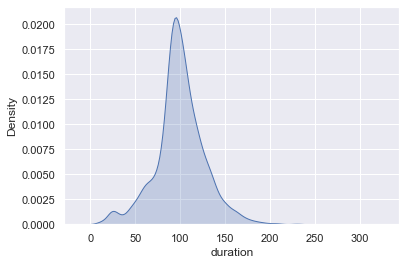

In [62]:
sns.set(style='darkgrid')
sns.kdeplot(netflix_movies['duration'], shade=True)